In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


/var/folders/q9/1cvgqw212sn3z0wpcdxcn4t00000gn/T/ipykernel_4657/2319814016.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("/Users/zihan/customer-churn-prediction/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.iloc[202:251]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
202,3363-DTIVD,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Electronic check,105.55,7405.5,No
203,7018-WBJNK,Male,0,No,Yes,13,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),78.30,1033.95,No
204,9142-KZXOP,Male,0,No,No,44,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),68.85,2958.95,No
205,7674-YTAFD,Female,0,No,No,33,Yes,No,Fiber optic,No,...,No,Yes,No,No,One year,Yes,Bank transfer (automatic),79.95,2684.85,No
206,6348-SNFUS,Male,0,Yes,Yes,72,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),55.45,4179.2,No
207,1285-OKIPP,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,79.90,79.9,Yes
208,7825-ECJRF,Female,0,No,No,19,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.60,1934.45,Yes
209,1347-KTTTA,Male,0,Yes,No,64,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),102.45,6654.1,No
210,7841-TZDMQ,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),46.00,84.5,Yes
211,4195-NZGTA,Female,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,25.25,25.25,No


In [3]:
new_df = df.drop(index=[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754])

print(new_df)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [4]:
new_df.iloc[1:7043]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


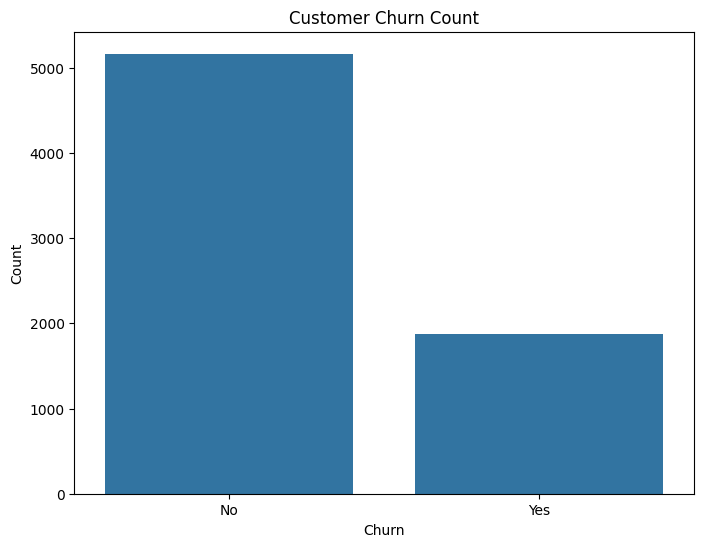

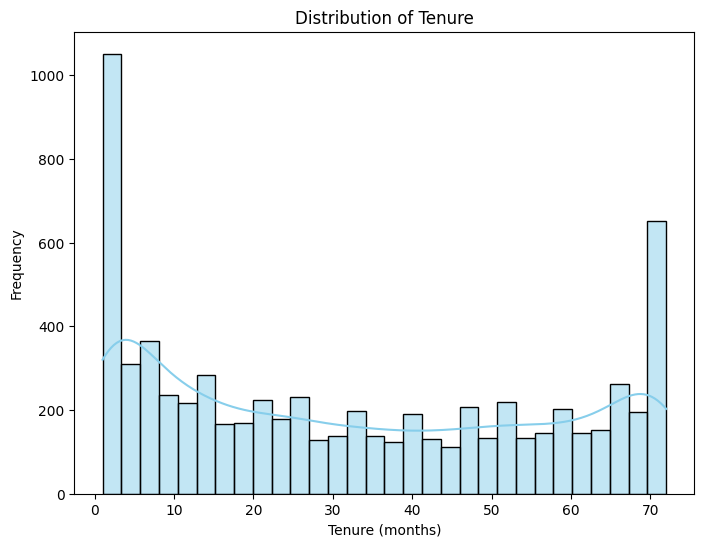

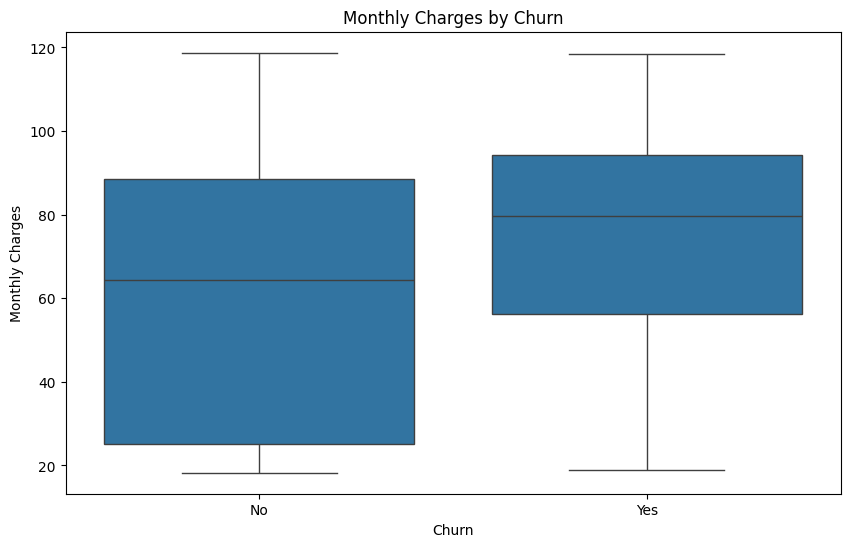

In [5]:
# --- Visualization 1: Count Plot for Customer Churn ---
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=new_df)
plt.title("Customer Churn Count")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# --- Visualization 2: Distribution Plot for 'Tenure' Feature ---
plt.figure(figsize=(8, 6))
sns.histplot(new_df['tenure'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Frequency")
plt.show()

# --- Visualization 3: Boxplot of Monthly Charges vs. Churn ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=new_df)
plt.title("Monthly Charges by Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

In [6]:
# Identify categorical columns
categorical_columns = new_df.select_dtypes(include=['object']).columns.tolist()

# Initialize and apply OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
one_hot_encoded = encoder.fit_transform(new_df[categorical_columns])

# Convert to DataFrame with proper column names
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Drop original categorical columns from new_df
new_df = new_df.drop(columns=categorical_columns)

# Concatenate numerical features with encoded categorical features
new_df = pd.concat([new_df, one_hot_df], axis=1)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Ensure 'Churn' exists in the dataset
print("Columns in new_df:", new_df.columns)

# If 'Churn' is missing but 'Churn_No' and 'Churn_Yes' exist, reconstruct the target column
if 'Churn' not in new_df.columns:
    if 'Churn_No' in new_df.columns and 'Churn_Yes' in new_df.columns:
        new_df['Churn'] = new_df['Churn_Yes']  # Convert to a binary target variable
        new_df = new_df.drop(columns=['Churn_No', 'Churn_Yes'])  # Remove one-hot encoded versions
        print("✅ Reconstructed 'Churn' column as a binary variable.")

# Verify again if 'Churn' is now available
print("Updated Columns in new_df:", new_df.columns)

print("✅ Categorical encoding completed. Here's a preview of the modified dataset:")
print(new_df.head())


Columns in new_df: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'customerID_0002-ORFBO',
       'customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       'customerID_0013-MHZWF', 'customerID_0013-SMEOE',
       ...
       'TotalCharges_996.85', 'TotalCharges_996.95', 'TotalCharges_997.65',
       'TotalCharges_997.75', 'TotalCharges_998.1', 'TotalCharges_999.45',
       'TotalCharges_999.8', 'TotalCharges_999.9', 'Churn_No', 'Churn_Yes'],
      dtype='object', length=13608)
✅ Reconstructed 'Churn' column as a binary variable.
Updated Columns in new_df: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'customerID_0002-ORFBO',
       'customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       'customerID_0013-MHZWF', 'customerID_0013-SMEOE',
       ...
       'TotalCharges_996.45', 'TotalCharges_996.85', 'TotalCharges_996.95',
       'TotalCharges_997.65', 'TotalCharges

In [7]:
X = new_df.drop(columns=["Churn"])
y = new_df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (5634, 13606)
Testing set size: (1409, 13606)


In [8]:
# Remove rows where Churn is NaN
new_df = new_df.dropna(subset=['Churn'])

# Recreate X and y after dropping missing values
X = new_df.drop(columns=['Churn'])
y = new_df['Churn']


In [9]:
print("Missing values in y after fixing:", y.isnull().sum())

Missing values in y after fixing: 0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
hgb_model = HistGradientBoostingClassifier(random_state=42)
hgb_model.fit(X_train, y_train)

# Predictions
y_pred_hgb = hgb_model.predict(X_test)

# Evaluation
print("\n🔹 HistGradientBoosting Model Performance 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_hgb))
print(classification_report(y_test, y_pred_hgb))



🔹 HistGradientBoosting Model Performance 🔹
Accuracy: 0.7846481876332623
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86      1048
         1.0       0.59      0.52      0.55       359

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407



⏳ Training Time: 16.42 seconds

🔹 Optimized XGBoost Performance 🔹
Accuracy: 0.7931769722814499
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      1048
         1.0       0.61      0.54      0.57       359

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407



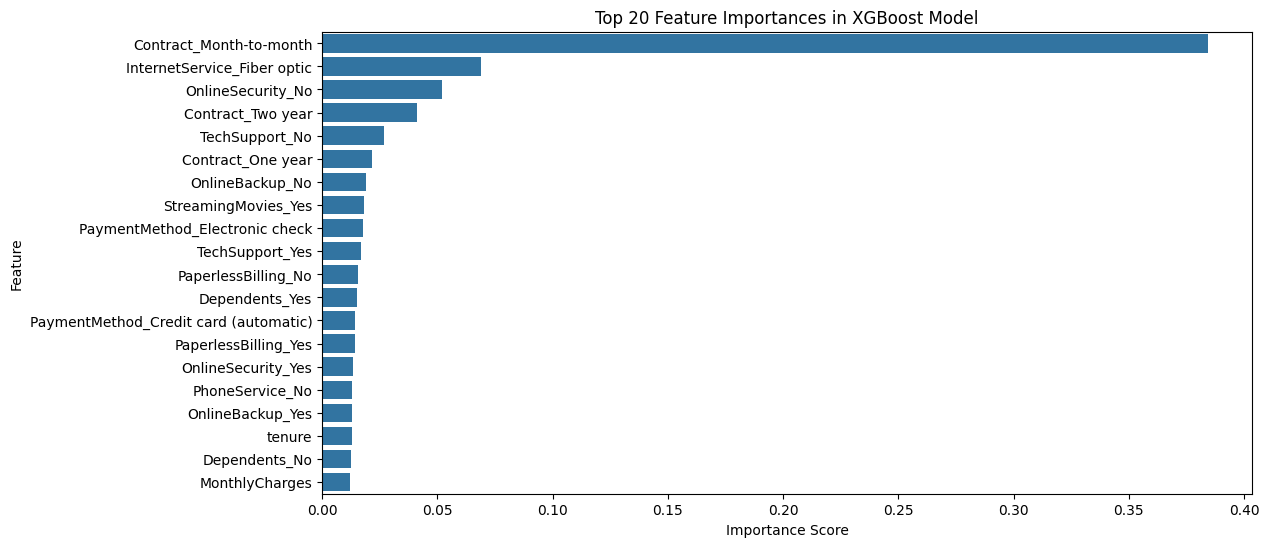

In [28]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import time

# Initialize the optimized XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,  # Reduce boosting rounds for speed
    learning_rate=0.1,  # Balanced learning rate
    max_depth=5,  # Prevent deep trees for faster training
    subsample=0.8,  # Use 80% of the data per tree
    colsample_bytree=0.8,  # Use 80% of the features per tree
    scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1],
    tree_method="hist",  # Fast CPU-based training (use "gpu_hist" if on NVIDIA GPU)
    random_state=42,
    eval_metric="logloss"
)

# Initialize optimized XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,  # Reduce boosting rounds for speed
    learning_rate=0.1,  # Balanced learning rate
    max_depth=5,  # Prevent deep trees for faster training
    subsample=0.8,  # Use 80% of the data per tree
    colsample_bytree=0.8,  # Use 80% of the features per tree
    tree_method="hist",  # Fast CPU-based training
    random_state=42
)

# Measure training time
start_time = time.time()

# Train without early stopping (fixed)
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],  # Validation set for tracking performance  
    verbose=False  # Suppress detailed logs
)

end_time = time.time()
print(f"⏳ Training Time: {end_time - start_time:.2f} seconds")


# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
print("\n🔹 Optimized XGBoost Performance 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Get feature importance scores
feature_importance = xgb_model.feature_importances_
feature_names = X.columns

# Sort feature importance
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot top 20 most important features
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance[sorted_idx][:20], y=np.array(feature_names)[sorted_idx][:20])
plt.title("Top 20 Feature Importances in XGBoost Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

